In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
sns.set_theme(color_codes=True)

In [3]:
df=pd.read_csv('pizza_v1.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [5]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


### Data Preprocessing Part1

In [6]:
#Remove rp and comma from price_rupiah column
df['price_rupiah']=df['price_rupiah'].str.replace('Rp','').str.replace(',','')

In [7]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


In [8]:
#check the number of unique value on object datatype

df.select_dtypes(include='object').nunique()

company          5
price_rupiah    43
topping         12
variant         20
size             6
extra_sauce      2
extra_cheese     2
dtype: int64

In [9]:
# convert price column from object to integer
df['price_rupiah']=df['price_rupiah'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    int32  
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 7.7+ KB


## Segment pizza Variant

In [11]:
df['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

<AxesSubplot:>

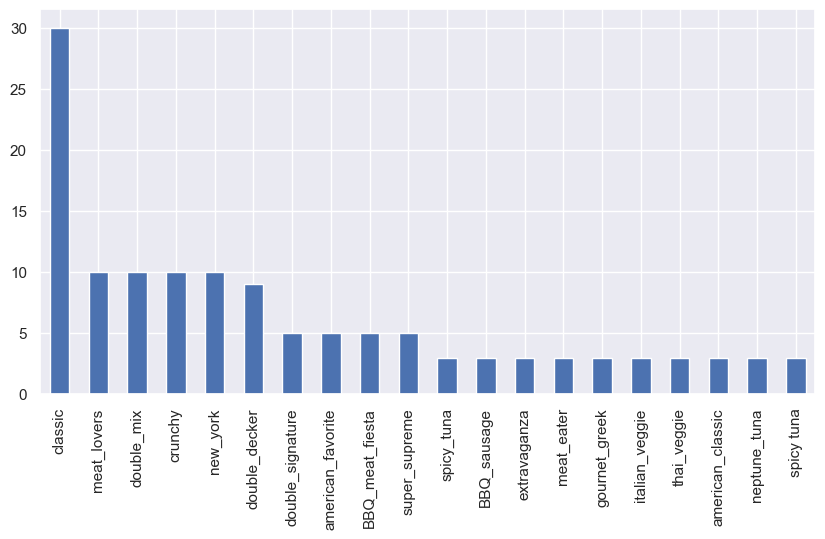

In [12]:
plt.figure(figsize=(10,5))
df['variant'].value_counts().plot(kind='bar')

### define functions to segment pizza names into types

In [13]:
def segment_variant(variant):
    if 'veggie' in variant:
        return 'Vegetarian'
    elif 'meat' in variant or 'BBQ' in variant:
        return 'Meat'
    elif 'tuna' in variant:
        return 'Seafood'
    else:
        return 'Other'
    

In [14]:
#apply funtions to 'Pizza Name' column to create new 'Pizza Type' column
df['variant']=df['variant'].apply(segment_variant)

<AxesSubplot:>

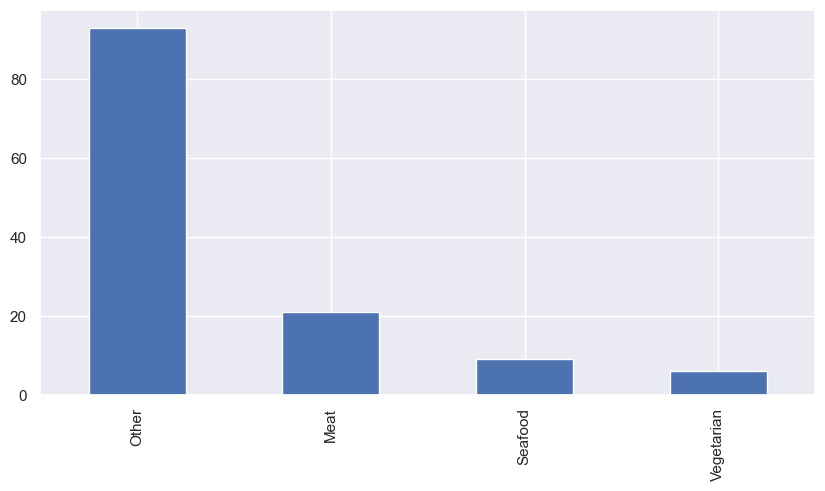

In [15]:
plt.figure(figsize=(10,5))
df['variant'].value_counts().plot(kind='bar')

### Exploratory Data Analysis

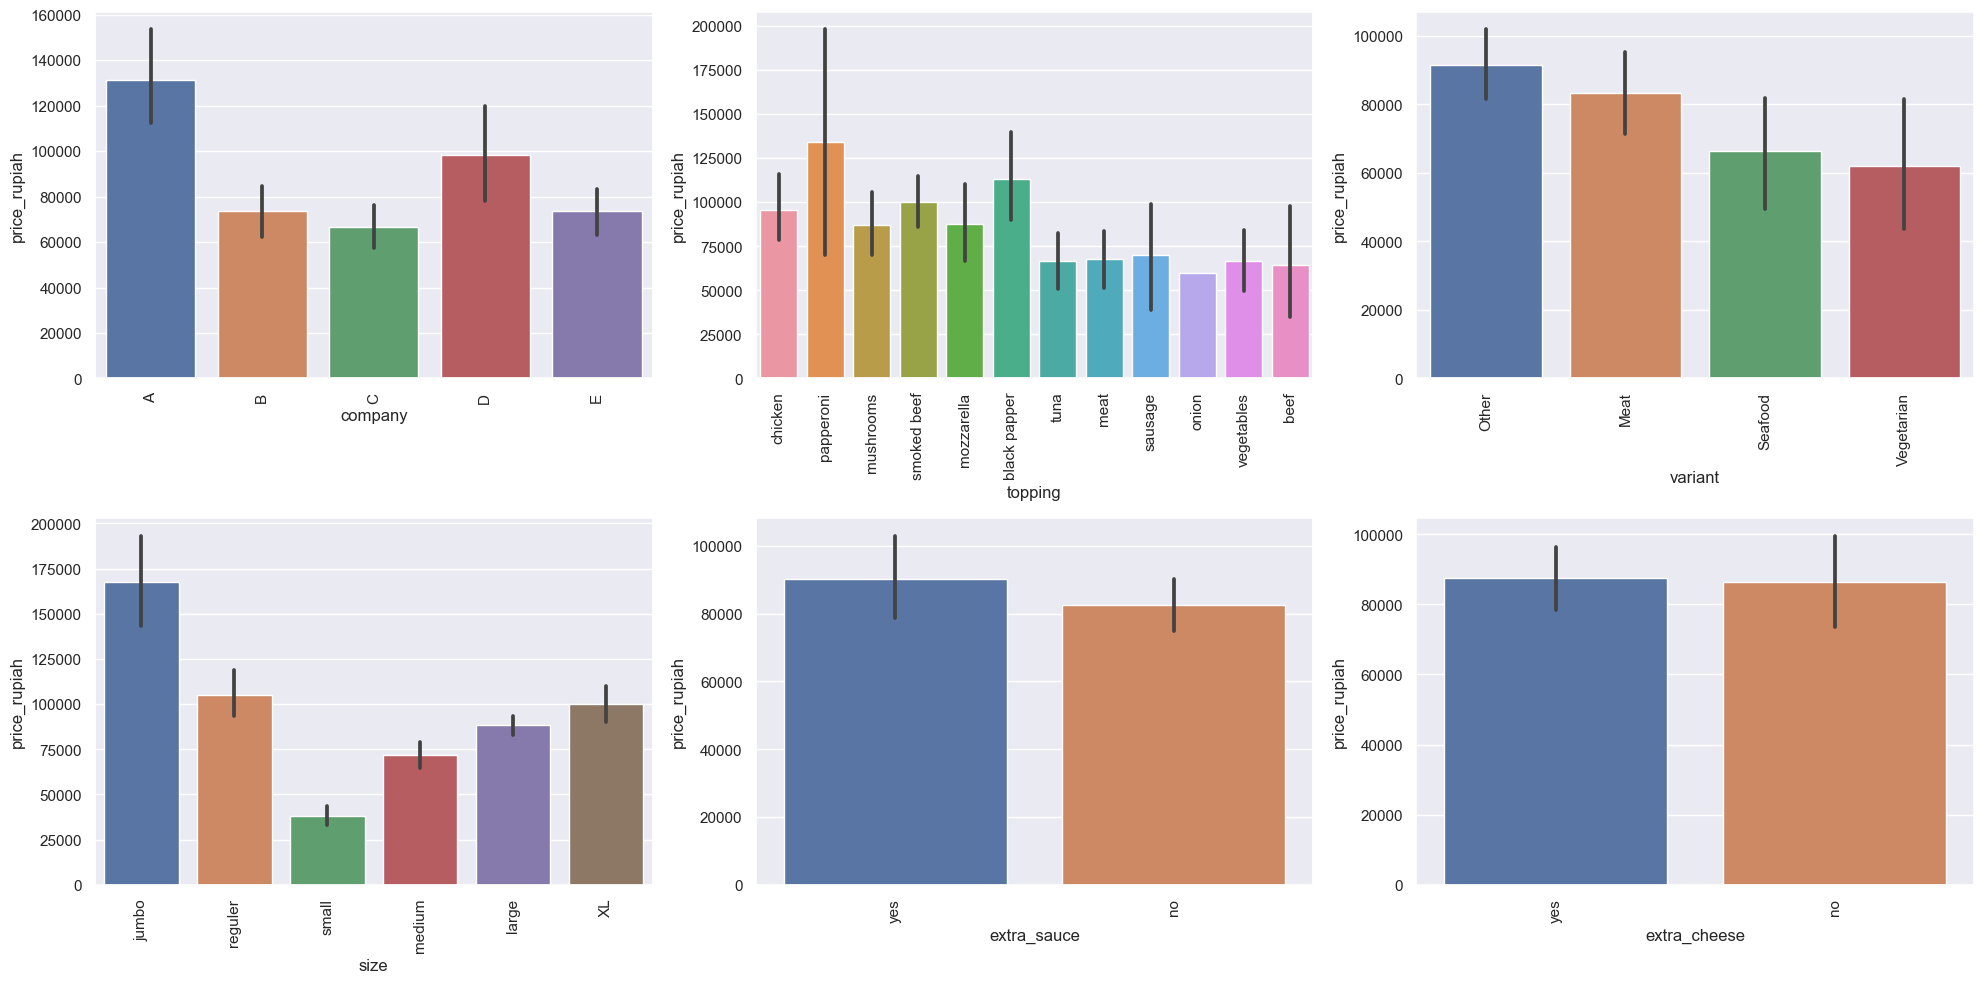

In [16]:
#list of categorical variable to plot
cat_vars=['company','topping','variant','size','extra_sauce','extra_cheese']

#create figure with subplots
fig, axs=plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axs=axs.ravel()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_rupiah', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    

#adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()



<AxesSubplot:xlabel='diameter'>

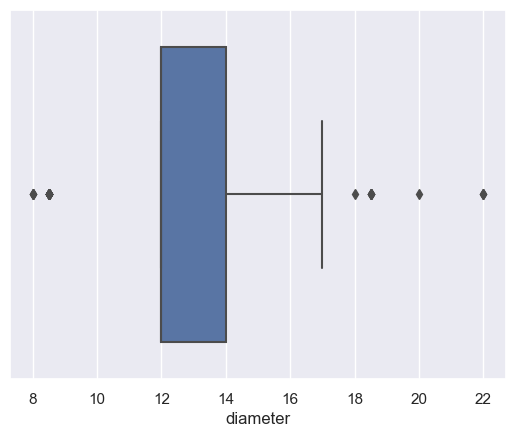

In [17]:
sns.boxplot(x='diameter',data=df)

<AxesSubplot:xlabel='diameter'>

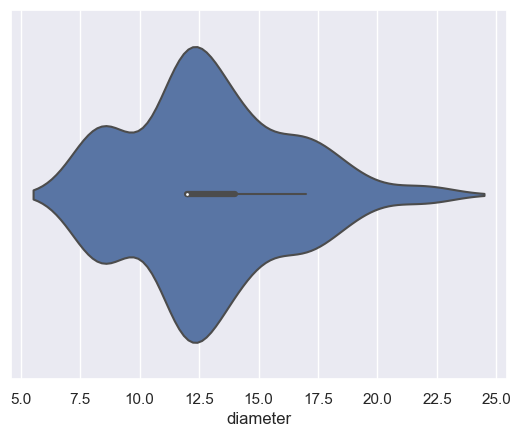

In [18]:
sns.violinplot(x='diameter', data=df)

<AxesSubplot:xlabel='diameter', ylabel='price_rupiah'>

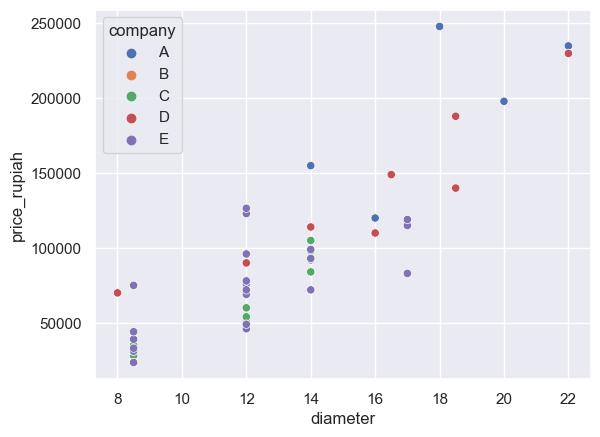

In [19]:
sns.scatterplot(data=df, x='diameter', y='price_rupiah', hue='company')

## Data Preprocessing Part2

In [20]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,Other,jumbo,yes,yes
1,A,198000,20.0,papperoni,Other,jumbo,yes,yes
2,A,120000,16.0,mushrooms,Other,reguler,yes,yes
3,A,155000,14.0,smoked beef,Other,reguler,yes,no
4,A,248000,18.0,mozzarella,Other,jumbo,yes,no


In [21]:
# check messing values 
check_missing= df.isnull().sum()*100/df.shape[0]
print(check_missing)

company         0.0
price_rupiah    0.0
diameter        0.0
topping         0.0
variant         0.0
size            0.0
extra_sauce     0.0
extra_cheese    0.0
dtype: float64


In [22]:
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

## Label Encoding for object Datatype


In [23]:
# loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #print the column name and the unique values
    print(f"{col}: {df[col].unique()}")


company: ['A' 'B' 'C' 'D' 'E']
topping: ['chicken' 'papperoni' 'mushrooms' 'smoked beef' 'mozzarella'
 'black papper' 'tuna' 'meat' 'sausage' 'onion' 'vegetables' 'beef']
variant: ['Other' 'Meat' 'Seafood' 'Vegetarian']
size: ['jumbo' 'reguler' 'small' 'medium' 'large' 'XL']
extra_sauce: ['yes' 'no']
extra_cheese: ['yes' 'no']


In [24]:
from sklearn import preprocessing

In [25]:
#loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #Initialize a LabelEncoder object
    label_encoder= preprocessing.LabelEncoder()
    
    #fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    #Transform the column using the encoder
    df[col]=label_encoder.transform(df[col])
    
    #print the column name and the unique values
    print(f"{col}: {df[col].unique()}")
    

company: [0 1 2 3 4]
topping: [ 2  7  5  9  4  1 10  3  8  6 11  0]
variant: [1 0 2 3]
size: [1 4 5 3 2 0]
extra_sauce: [1 0]
extra_cheese: [1 0]


## Here we have not removed outlier as data set is very small

# Correaltion Heatmap

<AxesSubplot:>

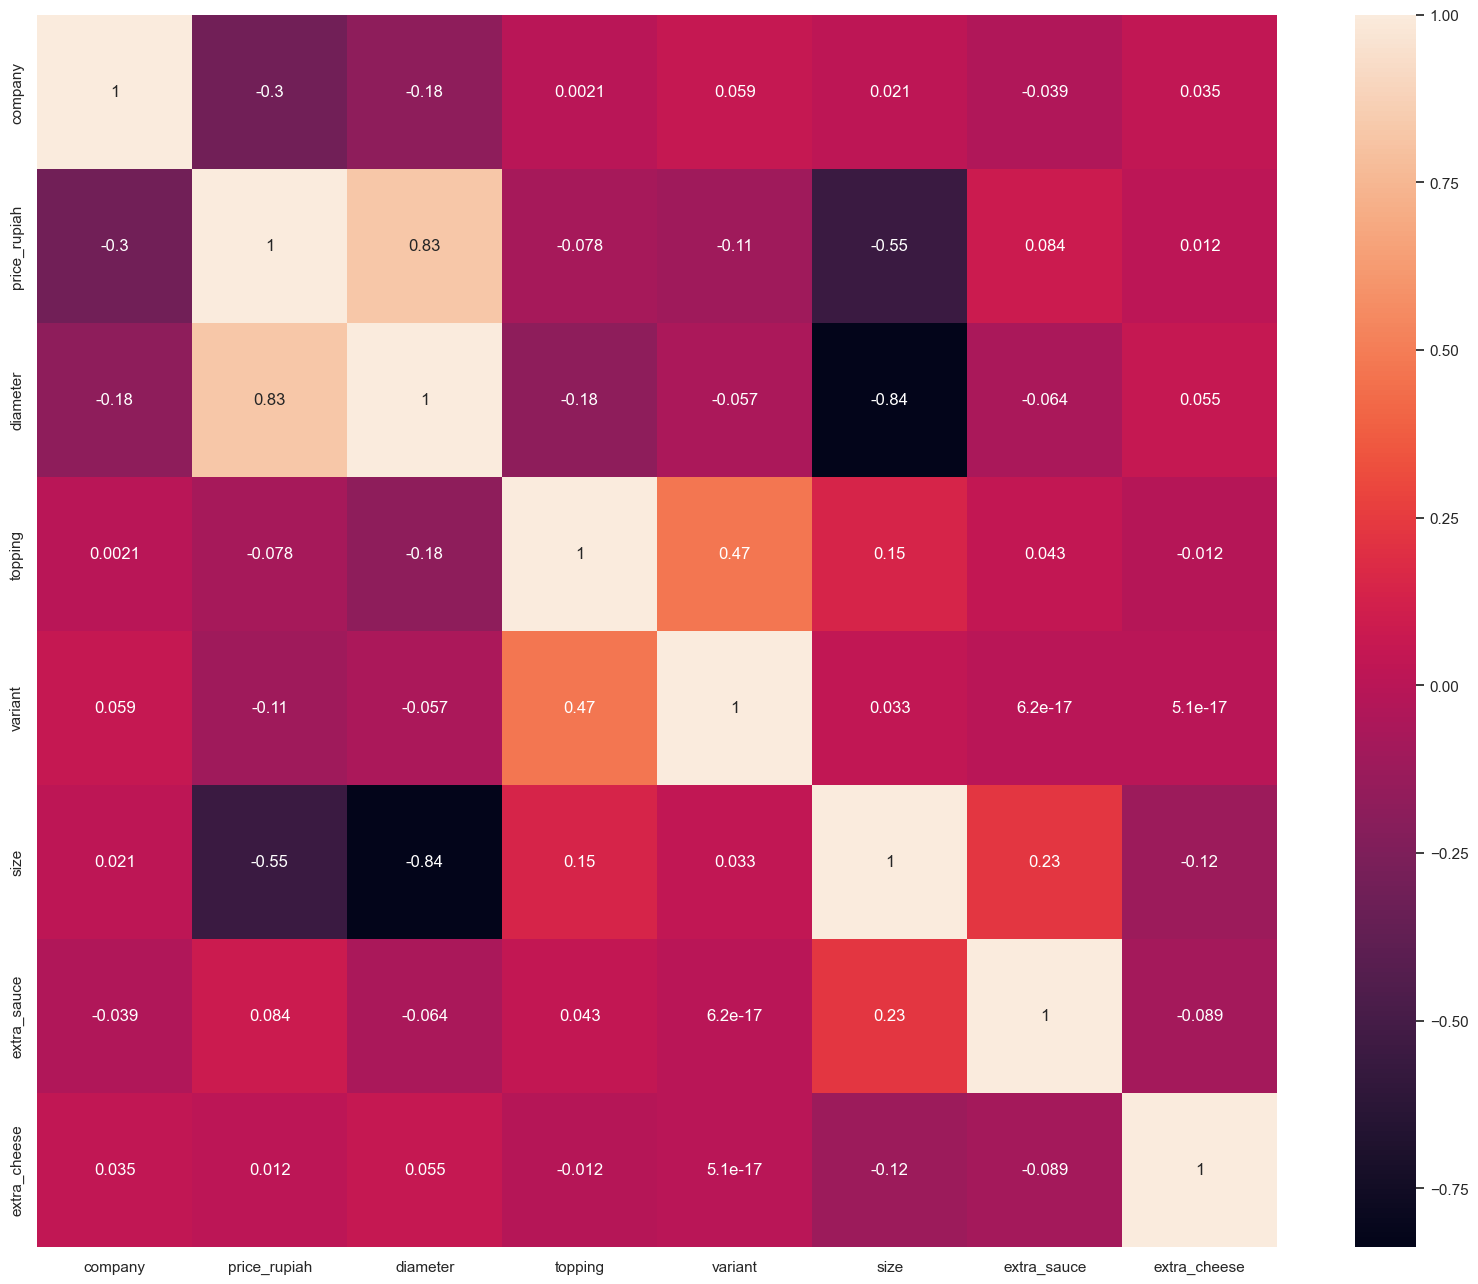

In [26]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

## Train Test Split

In [27]:
X= df.drop(['price_rupiah'], axis=1)
y=df['price_rupiah']

In [28]:
X.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,22.0,2,1,1,1,1
1,0,20.0,7,1,1,1,1
2,0,16.0,5,1,4,1,1
3,0,14.0,9,1,4,1,0
4,0,18.0,4,1,1,1,0


In [29]:
# test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)


### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


In [31]:
#Create a DecisionTreeRegressor object 
dtree=DecisionTreeRegressor()

# define the hyperparameters to tune and their values
param_grid= {
    'max_depth':[2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt','log2']
    
}

#Create a gridsearchCV object
grid_search= GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

#Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

#Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [32]:
from sklearn.tree import DecisionTreeRegressor
dtree= DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=1, min_samples_split=6)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=6,
                      random_state=0)

In [33]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math




In [34]:
y_pred= dtree.predict(X_test)


In [35]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)



In [36]:
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


MAE is 9919.23076923077
MAPE is 0.13218027982277267
MSE is 184851542.38618523
R2 score is 0.786104191224596
RMSE score is 13596.012003017106


In [70]:
imp_df=pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_  
})



In [71]:
imp_df

,Feature Name,Importance
0,company,0.026558
1,diameter,0.619003
2,topping,0.064172
3,variant,0.003428
4,size,0.207537
5,extra_sauce,0.075134
6,extra_cheese,0.004168


In [72]:
fi=imp_df.sort_values(by="Importance", ascending=False)

In [76]:
fi2=fi.head(10)
print(fi2)

   Feature Name  Importance
1      diameter    0.619003
4          size    0.207537
5   extra_sauce    0.075134
2       topping    0.064172
0       company    0.026558
6  extra_cheese    0.004168
3       variant    0.003428


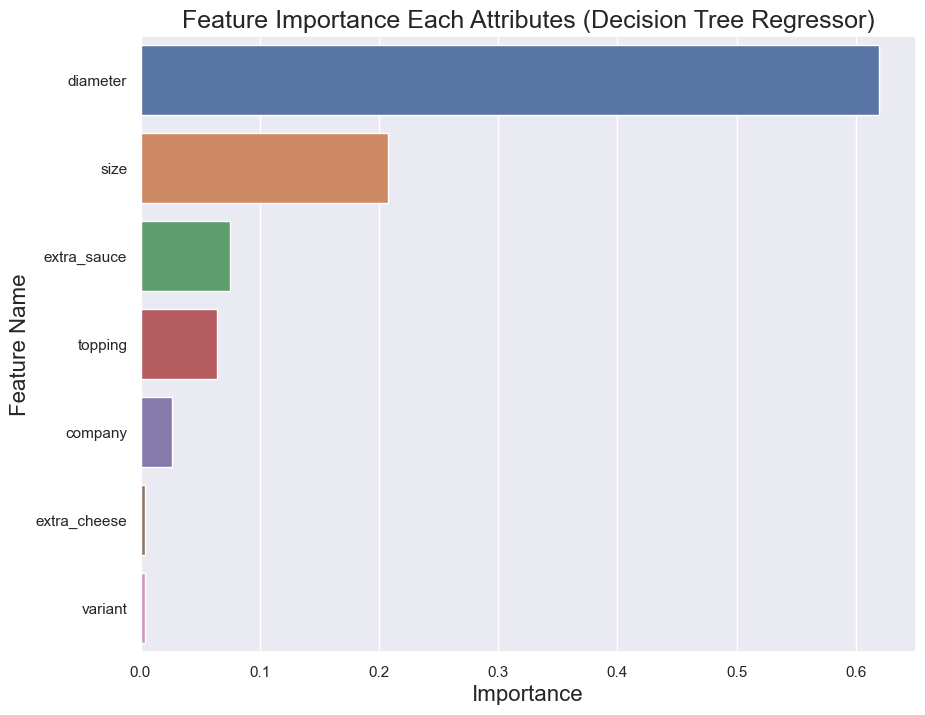

In [77]:
# show in diagram as well

plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

#so here we can see the important feature according to there importance

In [80]:
pip install shap

     -------------------------------------- 435.6/435.6 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


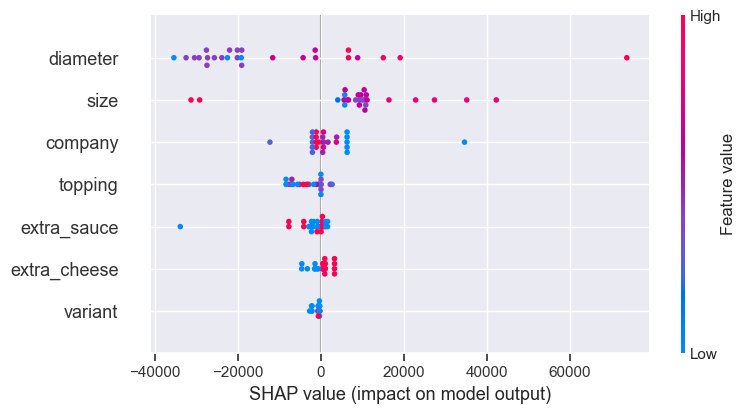

In [81]:
import shap
explainer= shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

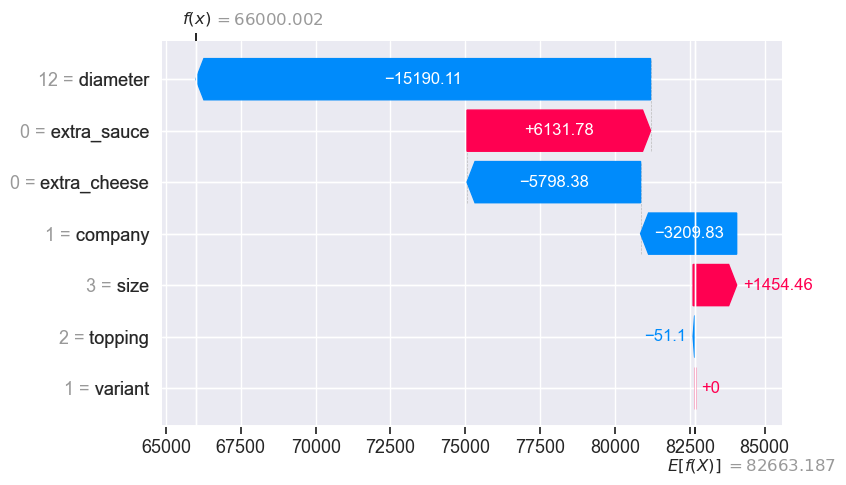

In [83]:
explainer=shap.Explainer(dtree, X_test)
shap_values=explainer(X_test)
shap.plots.waterfall(shap_values[0])

## Random Forest Regressors

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [86]:
#Create a RandomForestRegressor object
rf=RandomForestRegressor()

#define the hyperparameter grid
param_grid={
    "max_depth":[3,5,7,9],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features":['auto','sqrt']
    
}

#Create a GridSearchCV object
grid_search= GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

#Print the best hyperparameters
print("Best hyperparameters: ",grid_search.best_params_ )


Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [89]:
rf=RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=2,min_samples_leaf=1, max_features='auto')

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, random_state=0)

In [87]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math


In [90]:
y_pred== rf.predict(X_test)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [91]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 9919.23076923077
MAPE is 0.13218027982277267
MSE is 184851542.38618523
R2 score is 0.786104191224596
RMSE score is 13596.012003017106


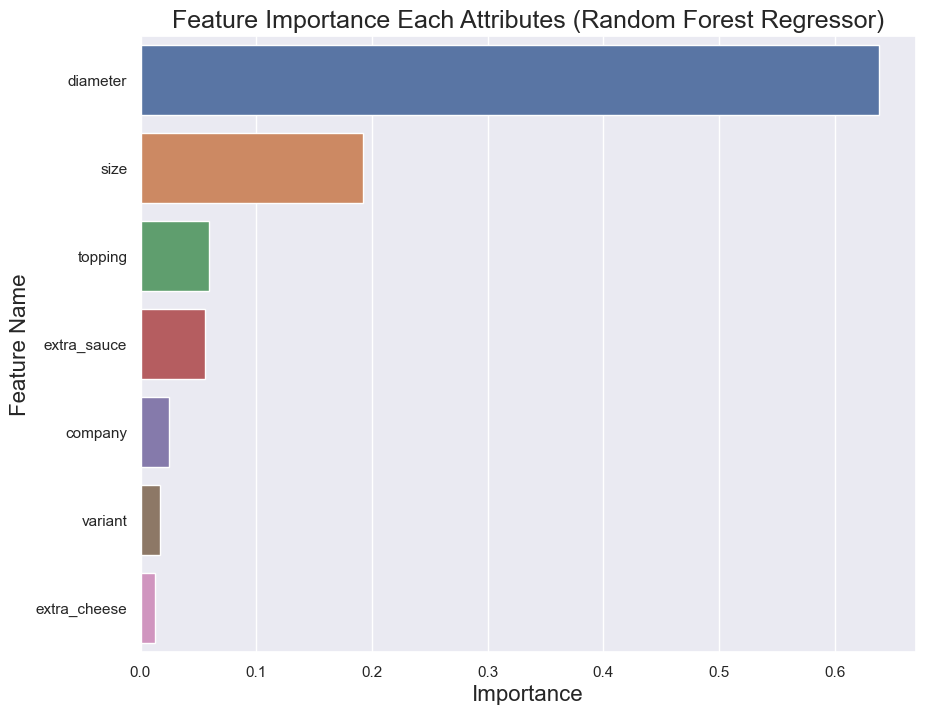

In [96]:
imp_df=pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_  
})

fi=imp_df.sort_values(by="Importance", ascending=False)
fi2=fi.head(10)
# show in diagram as well

plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

#so here we can see the important feature according to there importance



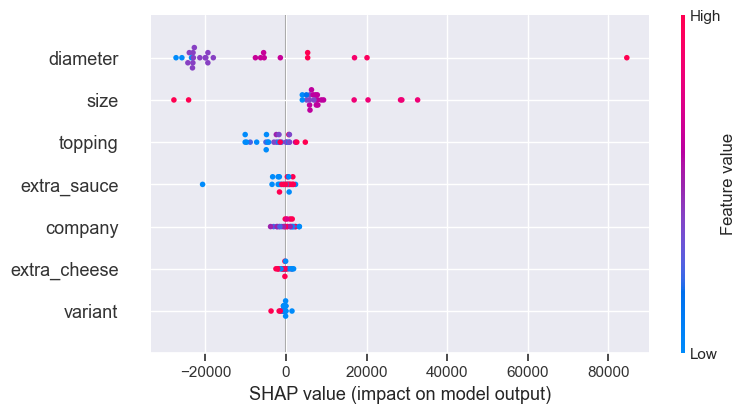

In [97]:
import shap
explainer= shap.TreeExplainer(rf)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

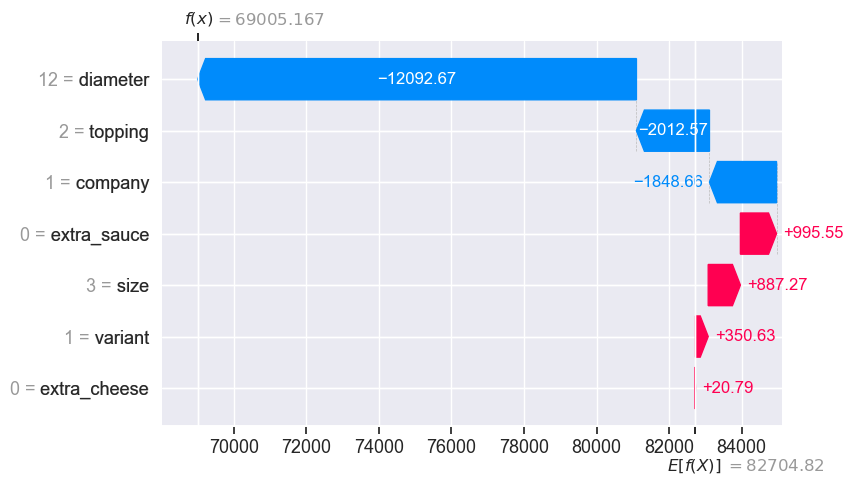

In [100]:
explainer=shap.Explainer(rf, X_test)
shap_values=explainer(X_test)
shap.plots.waterfall(shap_values[0])


## Adaboost Regressor

In [101]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

abr=AdaBoostRegressor()

#define parameters and possible values
params={
    'n_estimators': [50, 100, 150],
    'learning_rate':[0.01, 0.1, 1, 10]
}

#Perform  GridSearchCV with 5-fold cross 
grid_search= GridSearchCV(abr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)







Best hyperparameters:  {'learning_rate': 1, 'n_estimators': 100}


In [103]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor(random_state=0, learning_rate=1, n_estimators=100)
abr.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=100, random_state=0)

In [105]:
y_pred=abr.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 11310.953520583891
MAPE is 0.18546632912903405
MSE is 213998142.11136267
R2 score is 0.752378015933912
RMSE score is 14628.675336863645


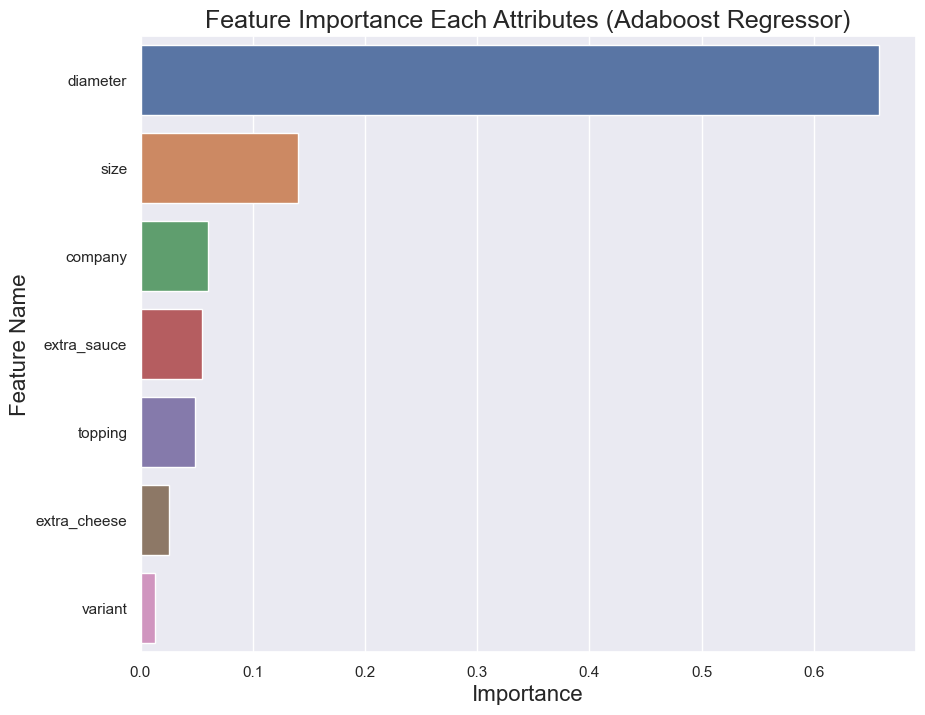

In [107]:
imp_df=pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": abr.feature_importances_  
})

fi=imp_df.sort_values(by="Importance", ascending=False)
fi2=fi.head(10)
# show in diagram as well

plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Adaboost Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

#so here we can see the important feature according to there importance